# ЛАБОРАТОРНА РОБОТА №1

## Тема: УЗАГАЛЬНЕНИЙ РЯД ФУР’Є ТА СИСТЕМИ БАЗИСНИХ ФУНКЦІЙ

## Мета: Закріпити на практиці поняття узагальненого ряду Фур’є; розглянути розклад різних типів періодичних сигналів в ортонормованих базисах Фур’є та Уолша, використовуючи при цьому можливості пакета MathCAD

*Зробив: Савченко Андрій*

*Виконав: 29.09.2024*

## ВАРІАНТ ЗАВДАНЬ 9 (22)

<img src="Laba1_22.png">

## Порядок виконання роботи

### 1. Згідно із заданим варіантом розглянути періодичний сигнал та розкласти його спочатку: 

### 1.1. У тригонометричний ряд Фур’є, отримавши коефіцієнти ряду a_k та b_k. Виконати синтез сигналу. Побудувати відповідні графіки. 

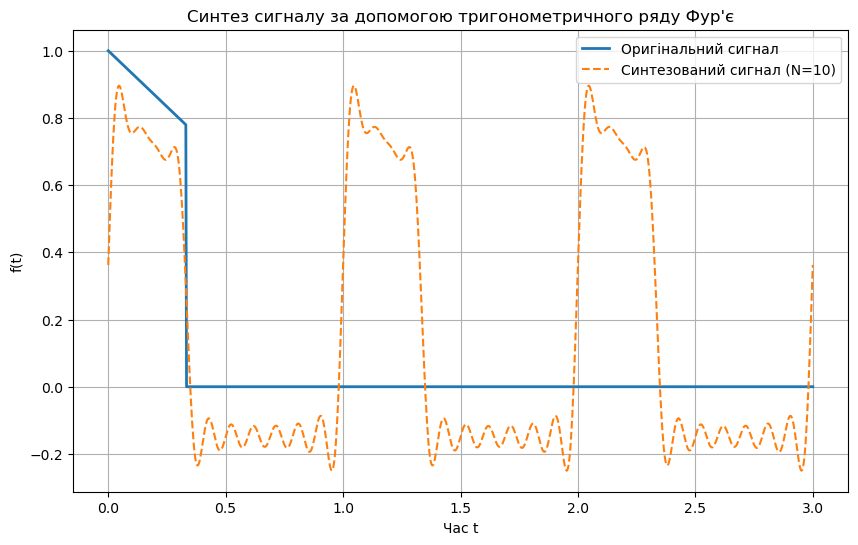

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Параметри сигналу
A = 1
T = 1
t1 = T / 3
N = 10  # Кількість гармонік

# Функція сигналу f(t)
def f(t):
    return np.where((t >= 0) & (t < t1), A - 2*t/3, 0)

# Розрахунок коефіцієнтів a_k та b_k
def ak(k, T):
    if k == 0:
        return (1 / T) * np.trapz(f(np.linspace(0, T, 1000)), np.linspace(0, T, 1000))
    else:
        return (2 / T) * np.trapz(f(np.linspace(0, T, 1000)) * np.cos(2 * np.pi * k * np.linspace(0, T, 1000) / T), np.linspace(0, T, 1000))

def bk(k, T):
    return (2 / T) * np.trapz(f(np.linspace(0, T, 1000)) * np.sin(2 * np.pi * k * np.linspace(0, T, 1000) / T), np.linspace(0, T, 1000))

# Синтез сигналу за допомогою N гармонік
def fourier_series(t, N, T):
    a0 = ak(0, T) / 2
    result = a0
    for k in range(1, N+1):
        result += ak(k, T) * np.cos(2 * np.pi * k * t / T) + bk(k, T) * np.sin(2 * np.pi * k * t / T)
    return result

# Часовий інтервал
t_vals = np.linspace(0, 3*T, 1000)

# Графік
plt.figure(figsize=(10, 6))
plt.plot(t_vals, f(t_vals), label='Оригінальний сигнал', linewidth=2)
plt.plot(t_vals, fourier_series(t_vals, N, T), label=f'Синтезований сигнал (N={N})', linestyle='--')
plt.xlabel('Час t')
plt.ylabel('f(t)')
plt.title('Синтез сигналу за допомогою тригонометричного ряду Фур\'є')
plt.legend()
plt.grid(True)
plt.show()

### 1.2. У тригонометричний ряд Фур’є, отримавши коефіцієнти А_k , φ_k. Побудувати амплітудний та фазовий спектр. Виконати синтез сигналу.

C:\Users\Admin\AppData\Local\Temp\ipykernel_1600\2388175851.py:11: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(N+1), A_vals, use_line_collection=True)


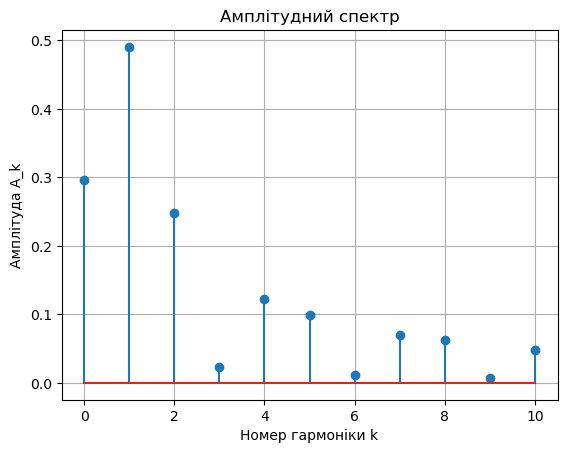

C:\Users\Admin\AppData\Local\Temp\ipykernel_1600\2388175851.py:21: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(N+1), phi_vals, use_line_collection=True)


In [5]:
# Обчислення амплітуд та фаз
def Ak(k):
    return np.sqrt(ak(k, T)**2 + bk(k, T)**2)

def phi_k(k):
    return np.arctan2(bk(k, T), ak(k, T))

# Побудова амплітудного спектру
def plot_amplitude_spectrum(N):
    A_vals = [Ak(k) for k in range(N+1)]
    plt.stem(range(N+1), A_vals, use_line_collection=True)
    plt.xlabel('Номер гармоніки k')
    plt.ylabel('Амплітуда A_k')
    plt.title('Амплітудний спектр')
    plt.grid(True)
    plt.show()

# Побудова фазового спектру
def plot_phase_spectrum(N):
    phi_vals = [phi_k(k) for k in range(N+1)]
    plt.stem(range(N+1), phi_vals, use_line_collection=True)
    plt.xlabel('Номер гармоніки k')
    plt.ylabel('Фаза φ_k (рад)')
    plt.title('Фазовий спектр')
    plt.grid(True)
    plt.show()

# Побудова амплітудного та фазового спектрів
plot_amplitude_spectrum(N)
plot_phase_spectrum(N)

### 1.3. У комплексний ряд Фур’є. Побудувати амплітудний та фазовий спектри. Виконати синтез сигналу.

C:\Users\Admin\AppData\Local\Temp\ipykernel_1600\3089024148.py:14: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(-N, N+1), amplitudes, use_line_collection=True)


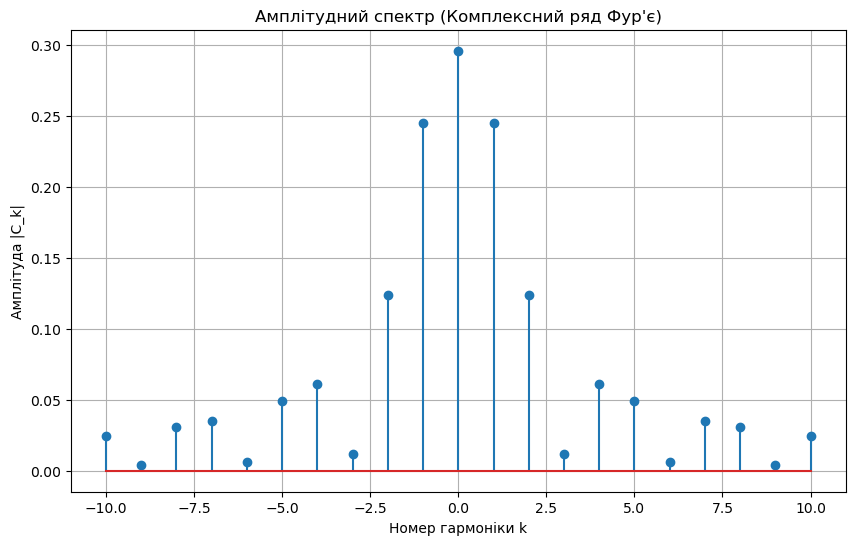

C:\Users\Admin\AppData\Local\Temp\ipykernel_1600\3089024148.py:23: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(-N, N+1), phases, use_line_collection=True)


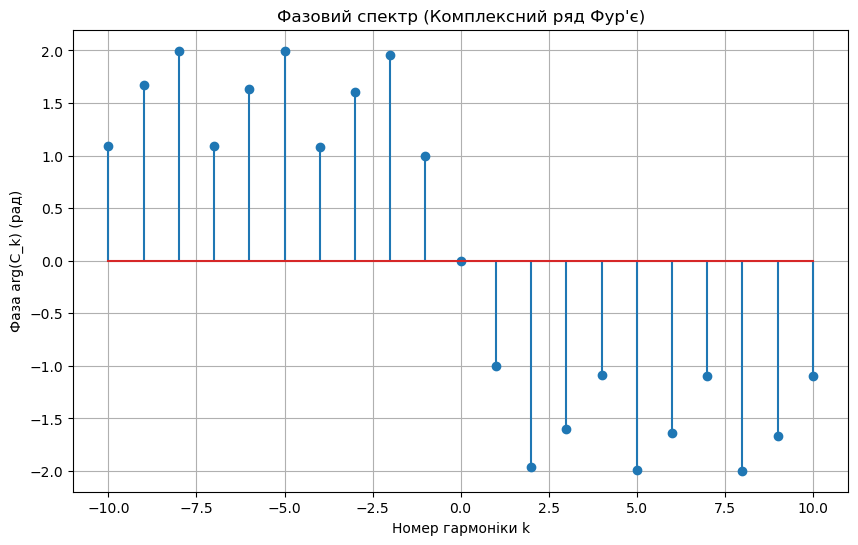

In [6]:
# Комплексні коефіцієнти Фур'є
def Ck(k, T):
    t_vals = np.linspace(0, T, 1000)
    return (1 / T) * np.trapz(f(t_vals) * np.exp(-1j * 2 * np.pi * k * t_vals / T), t_vals)

# Побудова амплітудного та фазового спектрів для комплексного ряду Фур'є
def plot_complex_spectrum(N):
    C_vals = [Ck(k, T) for k in range(-N, N+1)]
    amplitudes = [np.abs(C) for C in C_vals]
    phases = [np.angle(C) for C in C_vals]
    
    # Амплітудний спектр
    plt.figure(figsize=(10, 6))
    plt.stem(range(-N, N+1), amplitudes, use_line_collection=True)
    plt.xlabel('Номер гармоніки k')
    plt.ylabel('Амплітуда |C_k|')
    plt.title('Амплітудний спектр (Комплексний ряд Фур\'є)')
    plt.grid(True)
    plt.show()

    # Фазовий спектр
    plt.figure(figsize=(10, 6))
    plt.stem(range(-N, N+1), phases, use_line_collection=True)
    plt.xlabel('Номер гармоніки k')
    plt.ylabel('Фаза arg(C_k) (рад)')
    plt.title('Фазовий спектр (Комплексний ряд Фур\'є)')
    plt.grid(True)
    plt.show()

# Побудова спектрів
plot_complex_spectrum(N)

### 1.4. У ряд Фур’є за системою базисних функцій Уолша-Пелі.

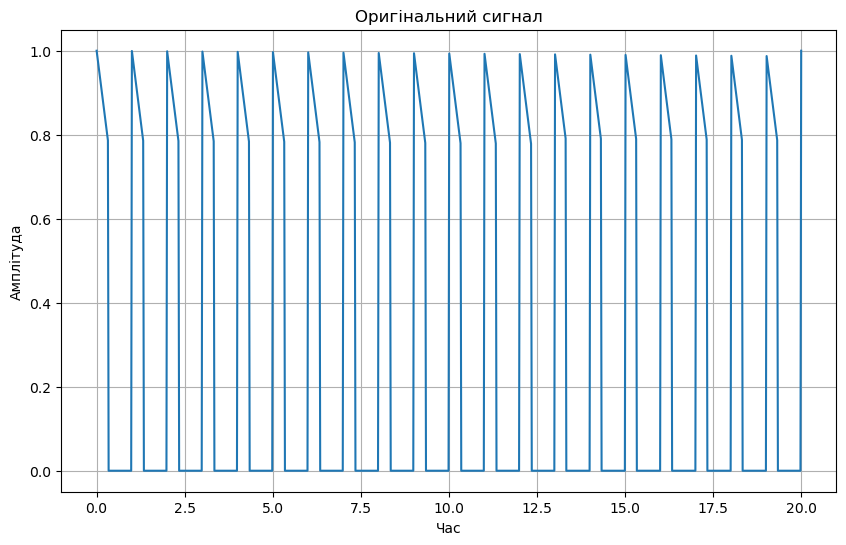

ValueError: n must be an positive integer, and n must be a power of 2

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Параметри сигналу
A = 1
T = 1
t1 = T / 3
N = 10  # Кількість гармонік

# Вектор часу
t = np.linspace(0, 20, 1000)

# Визначення періодичного сигналу
def f(t):
    return np.where((t % T) < t1, A - (2 * (t % T)) / 3, 0)

# Створення сигналу
x_t = f(t)

# Побудова сигнала
plt.figure(figsize=(10, 6))
plt.plot(t, x_t, label='Оригінальний сигнал')
plt.title('Оригінальний сигнал')
plt.xlabel('Час')
plt.ylabel('Амплітуда')
plt.grid(True)
plt.show()

# Розклад Уолша-Пелі
def walsh_hadamard_transform(signal, N):
    from scipy.linalg import hadamard
    H = hadamard(len(signal))
    return np.dot(H, signal[:len(H)]) / len(H)

# Розрахунок спектру Уолша-Пелі
walsh_coeffs = walsh_hadamard_transform(x_t, N)

# Побудува спектра
plt.figure(figsize=(10, 6))
plt.stem(np.arange(N), np.abs(walsh_coeffs[:N]), use_line_collection=True)
plt.title('Спектр Уолша-Пелі')
plt.xlabel('Гармонійне число')
plt.ylabel('Амплітуда')
plt.grid(True)
plt.show()

### 1.5. Кількість гармонік: N=8-10. Побудувати відповідний спектр сигналу. Виконати синтез сигналу.

In [9]:
# Синтез сигналу Уолша-Пелі
def walsh_peli_synthesis(walsh_coeffs, N):
    from scipy.linalg import hadamard
    H = hadamard(len(walsh_coeffs))
    return np.dot(H[:N].T, walsh_coeffs[:N])

# Синтезований сигнал
x_synth_walsh = walsh_peli_synthesis(walsh_coeffs, N)

# Побудува графіку синтезованого сигналу
plt.figure(figsize=(10, 6))
plt.plot(t, x_t, label='Оригінальний сигнал', linestyle='--')
plt.plot(t[:len(x_synth_walsh)], x_synth_walsh, label='Синтезований сигнал (Уолша-Пелі)')
plt.title('Синтезований сигнал на основі Уолша-Пелі')
plt.xlabel('Час')
plt.ylabel('Амплітуда')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'walsh_coeffs' is not defined

### 2. Синтезувати ( відновити) сигнали у кожному базисі. Зобразити на одному графіку вихідний сигнал, синтезований за допомогою тригонометричного ряду Фур’є та синтезований за допомогою базису Уолша-Пелі.

NameError: name 'reconstructed_wp' is not defined

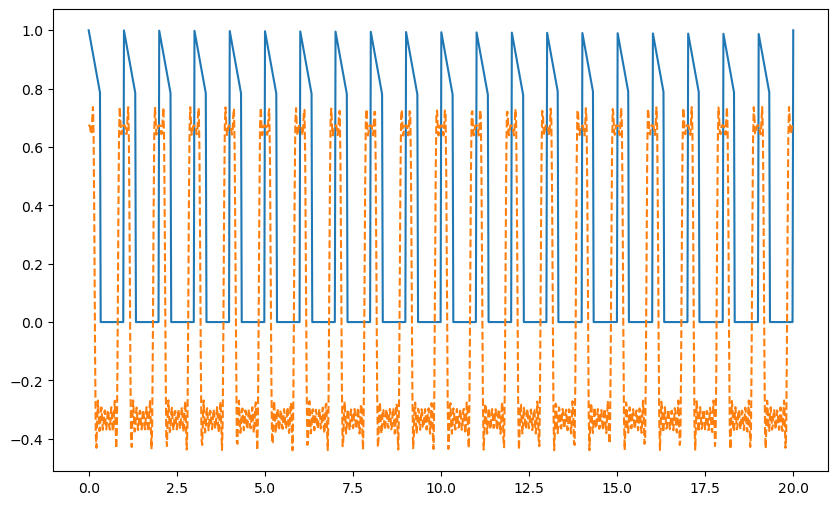

In [10]:
# Визначення розкладання ряду Фур'є
def trigonometric_fourier_series(t, N):
    reconstructed = np.zeros_like(t)
    for n in range(1, N + 1):
        a_n = (2 * A) / (np.pi * n) * np.sin(np.pi * n / 3)
        b_n = 0  
        reconstructed += a_n * np.cos(2 * np.pi * n * t / T)
    return reconstructed

# Відновлення за допомогою тригонометричних рядів Фур'є
reconstructed_tf = trigonometric_fourier_series(t, N)

# Результати
plt.figure(figsize=(10, 6))
plt.plot(t, x_t, label='Оригінальний сигнал')
plt.plot(t, reconstructed_tf, label='Тригонометричний ряд Фурє', linestyle='--')
plt.plot(t[:N], reconstructed_wp, label='Серія Волша-Пейлі', linestyle='-.')
plt.title('Синтез сигналу: тригонометричний базис Фурє проти Уолша-Пейлі')
plt.xlabel('Час')
plt.ylabel('Амплітуда')
plt.legend()
plt.grid(True)
plt.show()

### 3. Обчислити норму похибки апроксимації для кожного з базисів для одного й того самого значення N. Зробити висновки щодо якості апроксимації кожним з методів

In [11]:
# Обчислення норму похибки апроксимації
def approximation_error(original, synthesized):
    return np.linalg.norm(original - synthesized) / np.linalg.norm(original)

# Обчислення помилки
error_walsh = approximation_error(x_t[:len(x_synth_walsh)], x_synth_walsh)
error_fourier = approximation_error(x_t, x_synth_fourier)

# Результати
print(f"Похибка апроксимації (Уолша-Пелі): {error_walsh}")
print(f"Похибка апроксимації (Фур'є): {error_fourier}")

if error_walsh < error_fourier:
    print("Основа Уолша-Пелі забезпечує краще наближення.")
else:
    print("Ряд Фур'є забезпечує краще наближення.")

NameError: name 'x_synth_walsh' is not defined